### Imports

In [1]:
from preprocessing_functions import *
from topic_modeling_functions import *

import warnings
warnings.filterwarnings('ignore')

C:\Users\diede\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\venv_citynet3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


### Import (Lemmatised) Paragraphs

In [21]:
INPUT_DIR = "../../../../../data/clean/city_pair_paragraphs3/"
BATCHES = [5, 10, 20, 30, 40]
POS = ["NOUN", "VERB", "ADJ"]
ONLY_ENGLISH_WORDS = True
sort_by_paragraphs_count = True
merged_POS = True

data_list = import_lemmatised_paragraphs(INPUT_DIR, POS, BATCHES, ONLY_ENGLISH_WORDS=ONLY_ENGLISH_WORDS, merged_POS=merged_POS, sort_by_paragraphs=sort_by_paragraphs_count)

BATCHES: ['5', '10', '20', '30', '40']:   0%|          | 0/5 [00:00<?, ?it/s]

City Pair:   0%|          | 0/35 [00:00<?, ?it/s]

City Pair:   0%|          | 0/145 [00:00<?, ?it/s]

City Pair:   0%|          | 0/244 [00:00<?, ?it/s]

City Pair:   0%|          | 0/306 [00:00<?, ?it/s]

City Pair:   0%|          | 0/10 [00:00<?, ?it/s]

### Create Single Dataframe

In [23]:
frames = [citypair['lemmatized_paragraphs'] for citypair in data_list]
citypairs = [citypair['city_pair'] for citypair in data_list]

result = pd.concat(frames) #, keys=citypairs)
result.set_index('paragraph_id', inplace=True)
result.sort_index(inplace=True)
result.reset_index(inplace=True)
result

,paragraph_id,city_pair,paragraph,merged_POS
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide..."
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group..."
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci..."
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo..."
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde..."
...,...,...,...,...
399234,401783,warsaw_sofia,"as of 2013, pap had nearly 500 employees and a...","[pap, employee, associate, journalist, corresp..."
399235,401784,warsaw_sofia,schiller became famous for his 1934 staging of...,"[staging, polish, theatre, present, famous]"
399236,401785,warsaw_sofia,the disqualification was eventually shortened ...,"[disqualification, championship, record, metre..."
399237,401786,warsaw_sofia,"boris schatz was born in varniai, in the kovno...","[governorate, empire, day, father, teacher, ch..."


### Train Single LDA Model

In [ ]:
paragraphs = result.merged_POS

N_TOPICS = 6
MIN_DF = 0.05
MAX_DF = 0.9

dictionary, corpus = vectorize(paragraphs, MIN_DF=MIN_DF, MAX_DF=MAX_DF)

model_dict = train_lda_model(lemmatized_text=paragraphs,
                            dictionary=dictionary,
                            corpus=corpus,
                            MIN_DF=MIN_DF,
                            MAX_DF=MAX_DF,
                            N_TOPICS=N_TOPICS)

print(model_dict.keys())

### Load Desired Model

In [2]:
# path = "../../../../../data/clean/lda_models/300k_paragraphs/lda_model_6topics_0_05min_0_9max/"
path = os.getcwd() + '/' + 'lda_model_6_005min_09max'
forced_path = os.path.abspath(path)

LOAD_VIS=True,
LOAD_DICT=True,
LOAD_TEXTS=True,
LOAD_COHERENCE_SCORE=True

if os.path.exists(forced_path):
    model_dict = load_lda_model(forced_path,
                           LOAD_VIS=LOAD_VIS,
                           LOAD_DICT=LOAD_DICT,
                           LOAD_TEXTS=LOAD_TEXTS,
                           LOAD_COHERENCE_SCORE=LOAD_COHERENCE_SCORE)
    print(model_dict.keys())
else:
    print('Path is invalid')

### Visualisation

In [14]:
pyLDAvis.enable_notebook()

if 'visualisation' not in model_dict.keys():
    lda_conv = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model_dict['lda_model'])
    vis = gensimvis.prepare(lda_conv, corpus, dictionary, sort_topics=False)
    print(vis.topic_order)
else:
    vis = model_dict['visualisation']

vis

### Word-Topic Distribution

In [16]:
N_TOPICS = len(model_dict['lda_model'].get_topics())
MAX_WORDS = 30

for i in range(N_TOPICS):
    topic_words = model_dict['lda_model'].show_topic(i, topn=MAX_WORDS)
    print(i+1, [(x[0], round(x[1], 3)) for x in topic_words])
    print()

1 [('win', 0.035), ('final', 0.022), ('season', 0.02), ('club', 0.018), ('team', 0.018), ('play', 0.014), ('match', 0.014), ('league', 0.014), ('game', 0.013), ('goal', 0.013), ('time', 0.012), ('year', 0.011), ('score', 0.011), ('lose', 0.01), ('finish', 0.009), ('place', 0.009), ('round', 0.008), ('champion', 0.008), ('defeat', 0.008), ('championship', 0.008), ('world', 0.007), ('title', 0.007), ('player', 0.007), ('competition', 0.006), ('draw', 0.006), ('football', 0.006), ('end', 0.006), ('event', 0.005), ('medal', 0.005), ('olympic', 0.005)]

2 [('art', 0.041), ('study', 0.029), ('work', 0.023), ('school', 0.014), ('exhibition', 0.014), ('university', 0.013), ('museum', 0.013), ('professor', 0.011), ('gallery', 0.011), ('include', 0.01), ('year', 0.01), ('bear', 0.01), ('international', 0.008), ('member', 0.007), ('receive', 0.007), ('research', 0.006), ('graduate', 0.006), ('award', 0.006), ('college', 0.006), ('hold', 0.006), ('society', 0.006), ('contemporary', 0.006), ('acade

### Document (=paragraphs) topic distribution

In [17]:
import pandas as pd

transformed_docs = model_dict['lda_model'].load_document_topics()
topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in transformed_docs], 
             columns=['topic_{}'.format(i+1) for i in range(N_TOPICS)])

# Give Topics sensible names
topic_distributions_renamed_cols=topic_distributions.rename(columns = { 'topic_1': 'lda_sport',
                                        'topic_2': 'lda_art',
                                        'topic_3': 'lda_entertainment',
                                        'topic_4': 'lda_diplomacy',
                                        'topic_5': 'lda_transportation',
                                        'topic_6': 'lda_education'}, inplace = False)

In [18]:
topic_distributions_renamed_cols

,lda_sport,lda_art,lda_entertainment,lda_diplomacy,lda_transportation,lda_education
0,0.000803,0.026252,0.001479,0.646088,0.001313,0.324066
1,0.000575,0.001042,0.001059,0.000993,0.000940,0.995391
2,0.000916,0.001662,0.001688,0.001583,0.992193,0.001958
3,0.001766,0.003203,0.003254,0.003051,0.603039,0.385687
4,0.002857,0.005182,0.005264,0.004936,0.887383,0.094377
...,...,...,...,...,...,...
399234,0.003134,0.005684,0.005774,0.973584,0.005127,0.006697
399235,0.006074,0.011017,0.761835,0.198155,0.009938,0.012981
399236,0.988298,0.002318,0.002355,0.002208,0.002091,0.002731
399237,0.000398,0.271229,0.000733,0.000688,0.000651,0.726301


### Topic Distributions

In [19]:
topic_distributions_renamed_cols.idxmax(axis="columns").value_counts()

lda_entertainment     83676
lda_education         76864
lda_art               68270
lda_transportation    63989
lda_diplomacy         60404
lda_sport             46036
dtype: int64

### Merge paragraphs with topic distributions

In [24]:
updated_results = pd.concat([result, topic_distributions_renamed_cols],
                  axis = 1)

In [ ]:
# updated_results[updated_results['lda_sport']> 0.8].head(20)

In [25]:
 updated_results[topic_distributions_renamed_cols.columns]

,lda_sport,lda_art,lda_entertainment,lda_diplomacy,lda_transportation,lda_education
0,0.000803,0.026252,0.001479,0.646088,0.001313,0.324066
1,0.000575,0.001042,0.001059,0.000993,0.000940,0.995391
2,0.000916,0.001662,0.001688,0.001583,0.992193,0.001958
3,0.001766,0.003203,0.003254,0.003051,0.603039,0.385687
4,0.002857,0.005182,0.005264,0.004936,0.887383,0.094377
...,...,...,...,...,...,...
399234,0.003134,0.005684,0.005774,0.973584,0.005127,0.006697
399235,0.006074,0.011017,0.761835,0.198155,0.009938,0.012981
399236,0.988298,0.002318,0.002355,0.002208,0.002091,0.002731
399237,0.000398,0.271229,0.000733,0.000688,0.000651,0.726301


### Get dominant topic and score of chunked dataframe

In [58]:
import numpy as np
nr_of_chunks = (len(updated_results) // 25000) + 1

chunked_dataframe = np.array_split(updated_results, nr_of_chunks)

In [60]:
from tqdm.notebook import tqdm

for i, subdataframe in enumerate(tqdm(chunked_dataframe)):
    chunked_dataframe[i] = pd.concat([subdataframe, subdataframe[topic_distributions_renamed_cols.columns].agg(['idxmax','max'],axis=1)], axis=1)

  0%|          | 0/15 [00:00<?, ?it/s]

In [62]:
final_df = pd.concat(chunked_dataframe,axis=0)

In [64]:
final_df_renamed_cols = final_df.rename(columns = { 'idxmax': 'lda_dominant',
                                        'max': 'lda_dominant_score'}, inplace = False)

### Save document topic distribution

In [68]:
final_df_renamed_cols.to_csv('..\..\..\..\..\data\clean\classified_50cities_740citypairs_400k_paragraphs.csv', index=False)

### Graphed density of the grouped topic scores

Text(0, 0.5, 'Density')

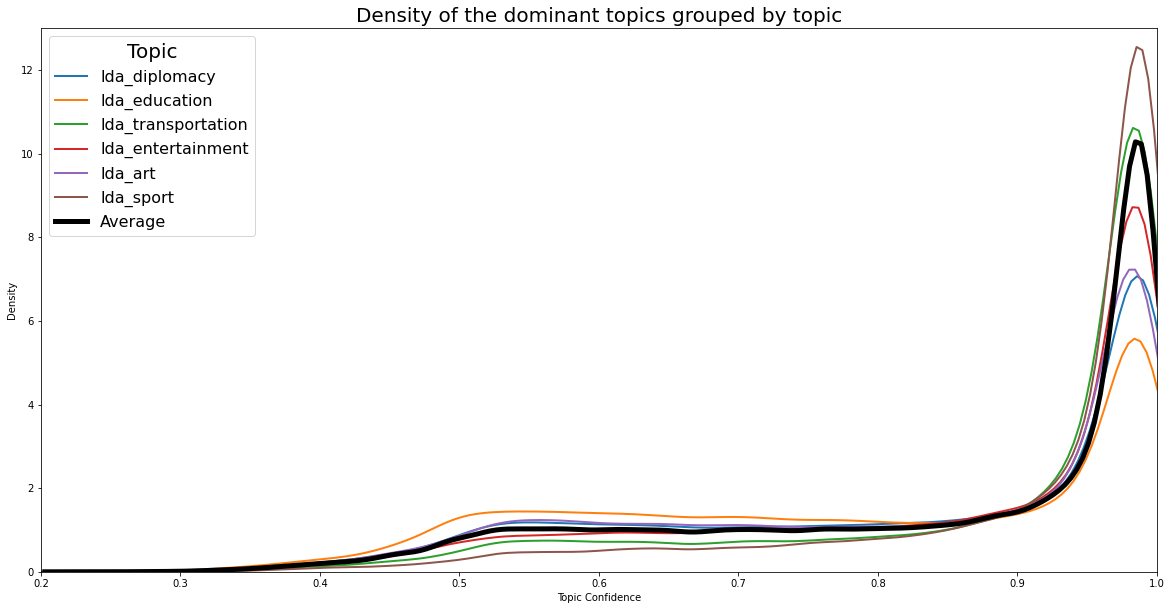

In [84]:
# !pip install seaborn
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20,10))
a = final_df_renamed_cols.groupby('lda_dominant')

# Iterate through the five airlines
for topic in final_df_renamed_cols['lda_dominant'].unique():
    b = a['lda_dominant_score'].get_group(topic)
    
    #     b.plot.density(color='green')
    # plt.title('Density plot for Speeding')
    # plt.show()
    
    sns.distplot(b, hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = topic)
    
# Plot formatting
sns.distplot(final_df_renamed_cols['lda_dominant_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 5},
                 color = 'black',
                 label = 'Average')

plt.legend(prop={'size': 16}, title = 'Topic', title_fontsize=20)
plt.title('Density of the dominant topics grouped by topic', fontsize=20)
plt.xlabel('Topic Confidence')
plt.ylim(0, 13)
plt.xlim(0.2, 1)
plt.ylabel('Density')

# Extras

### Train Multiple LDA Models

In [ ]:
TOPIC_SELECTION = range(6, 7,1)
list(TOPIC_SELECTION)

In [ ]:
"""
%%time

OUTPUT_DIR = '../../../../../data/clean/lda_models/300k_paragraphs/'
TOPIC_SELECTION = range(6, 7,1)
paragraphs = result.merged_POS
MIN_DF = 1
MAX_DF = 1.0
GET_COHERENCE_SCORE = True
N_ITERATIONS=1000

# Vectorization
dictionary, corpus = vectorize(paragraphs, MIN_DF=MIN_DF, MAX_DF=MAX_DF)

models = compare_lda_models(OUTPUT_DIR=OUTPUT_DIR,
                            TOPIC_SELECTION=TOPIC_SELECTION,
                            LEMMATIZED_TEXT=paragraphs,
                            DICTIONARY=dictionary,
                            CORPUS=corpus,
                            MIN_DF=MIN_DF,
                            MAX_DF=MAX_DF,
                            N_ITERATIONS=N_ITERATIONS,
                            # optimize_interval=10 by default
                            PATH_TO_MALLET=r'C:/mallet/bin/mallet.bat',
                            GET_COHERENCE_SCORE=GET_COHERENCE_SCORE,
                            COHERENCE='c_v')
"""

### Save LDA Model

In [87]:
"""
import os

OUTPUT_DIR = os.getcwd()
MODEL_NAME = 'lda_model_6_005min_09max'
MODEL = model_dict['lda_model']
COHERENCE_SCORE = model_dict['coherence_score']
TEXTS = paragraphs
DICTIONARY = model_dict['dictionary']
CORPUS = model_dict['corpus']
VIS = vis

SAVE_VIS = True
SAVE_DICT = True
SAVE_TEXTS = True
SAVE_COHERENCE_SCORE = True

save_lda_model(MODEL=model['lda_model'],
                OUTPUT_DIR=OUTPUT_DIR,
                NAME=MODEL_NAME,
                COHERENCE_SCORE=COHERENCE_SCORE,
                DICTIONARY=DICTIONARY,
                CORPUS=CORPUS,
                TEXTS=TEXTS,
                VIS=VIS,
                SAVE_VIS=SAVE_VIS,
                SAVE_DICT=SAVE_DICT,
                SAVE_TEXTS=SAVE_TEXTS,
                SAVE_COHERENCE_SCORE=SAVE_COHERENCE_SCORE
              )
"""

NameError: name 'paragraphs' is not defined